<a href="https://www.kaggle.com/code/salenana/notebook94a017c2ec?scriptVersionId=216350941" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Оцінка моделі 1

In [2]:
from keras.models import load_model
from tensorflow.keras.layers import Layer
from transformers import TFBertModel, TFBertMainLayer, BertConfig
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Завантаження тестових даних
test_data = pd.read_csv('/kaggle/input/datatest/test_data.csv')
test_data.head()

,id,cleaned_comment_text,input_ids,attention_masks,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding I think very highl...,"[101, 4067, 2017, 2005, 4824, 1045, 2228, 2200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
1,000247e83dcc1211,Dear god this site is horrible,"[101, 6203, 2643, 2023, 2609, 2003, 9202, 102,...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0
2,0002f87b16116a7f,Somebody will invariably try to add Religion R...,"[101, 8307, 2097, 26597, 3046, 2000, 5587, 467...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
3,0003e1cccfd5a40a,It says it right there that it IS a type The T...,"[101, 2009, 2758, 2009, 2157, 2045, 2008, 2009...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0
4,00059ace3e3e9a53,Before adding a new product to the list make s...,"[101, 2077, 5815, 1037, 2047, 4031, 2000, 1996...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,0,0,0,0,0


In [4]:
# Перетворюємо стовпці 'input_ids' у формат NumPy масиву, використовуючи eval для конвертації рядкових представлень у списки
input_ids = np.array([eval(item) for item in test_data['input_ids']])

# Перетворюємо стовпці 'attention_masks' у формат NumPy масиву, використовуючи eval для конвертації рядкових представлень у списки
attention_masks = np.array([eval(item) for item in test_data['attention_masks']])

# Створюємо NumPy масив з мітками для кожного токсичного класу
y_test = np.array(test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']])

# Витягуємо справжні мітки з тих же стовпців таблиці `test_data` та перетворюємо їх у формат NumPy масиву
true_labels = test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [ ]:
#  Отримання прогнозів моделі
predictions_1 = model.predict({'input_ids': input_ids, 'attention_mask': attention_masks})

 101/2000 [>.............................] - ETA: 8:33

## 1. Класифікаційний звіт
Генерація звіту, який включає наступні метрики:  
Precision (Точність): Частка правильно передбачених позитивних прикладів серед усіх прикладів, передбачених як позитивні.  
Recall (Повнота): Частка правильно передбачених позитивних прикладів серед усіх реальних позитивних прикладів.  
F1-score: Гармонійне середнє між точністю та повнотою.  
Support: Кількість реальних прикладів для кожного класу.

In [47]:
# Перетворення прогнозів у бінарний формат
threshold_1 = 0.5
preds_binary_1 = (predictions_1 >= threshold_1).astype(int)

# Оцінка за допомогою класифікаційного звіту
print("Classification Report:\n", classification_report(
    true_labels, 
    preds_binary_1, 
    target_names=[
        'toxic', 
        'severe_toxic', 
        'obscene', 
        'threat', 
        'insult', 
        'identity_hate'
]))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.10      1.00      0.17      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.15      0.19      0.17      3691
       threat       0.00      0.00      0.00       211
       insult       0.19      0.06      0.10      3427
identity_hate       0.11      0.00      0.01       712

    micro avg       0.10      0.48      0.17     14498
    macro avg       0.09      0.21      0.07     14498
 weighted avg       0.13      0.48      0.14     14498
  samples avg       0.09      0.06      0.06     14498



/Users/lena/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lena/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Висновок:
1.Загальна ефективність моделі досить низька, що видно з мікро- та макро-середніх показників (f1-score близько 0.07-0.17).

По окремих класах:  
"toxic": має високий recall (1.00), але дуже низьку precision (0.10), що означає що модель позначає як токсичні багато невинних коментарів;
"severe_toxic" і "threat": модель повністю провалилась (всі метрики 0.00);  
"obscene": показує трохи кращі результати (precision 0.15, recall 0.19);  
"insult": має найвищу precision (0.19), але дуже низький recall (0.06);   
"identity_hate": практично не визначається (f1-score лише 0.01).

## 3. Обчислення метрики ROC-AUC для кожного класу
ROC-AUC (Receiver Operating Characteristic - Area Under Curve) є мірою якості класифікатора, яка оцінює, наскільки добре модель відділяє позитивні та негативні зразки. Значення варіюється в межах від 0 до 1:

1.0: Ідеальний класифікатор (усі позитивні й негативні зразки правильно розділені).  
0.5: Випадкове вгадування (модель не може відрізнити класи).  
Менше 0.5: Модель працює гірше, ніж випадкове вгадування (інверсія передбачень).  

In [48]:
from sklearn.metrics import classification_report, roc_auc_score
roc_auc_scores = {
    label: roc_auc_score(true_labels[:, i], predictions_1[:, i]) for i, label in enumerate([
        'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
    ])
}
print("ROC-AUC Scores:")
for label, score in roc_auc_scores.items():
    if score == 1.0:
        explanation = "Ідеальний класифікатор."
    elif score == 0.5:
        explanation = "Випадкове вгадування."
    elif score > 0.5:
        explanation = "Модель краще, ніж випадкове вгадування."
    else:
        explanation = "Модель працює гірше, ніж випадкове вгадування."
    
    print(f"{label.capitalize():<15}: {score:.3f} - {explanation}")

ROC-AUC Scores:
Toxic          : 0.348 - Модель працює гірше, ніж випадкове вгадування.
Severe_toxic   : 0.689 - Модель краще, ніж випадкове вгадування.
Obscene        : 0.507 - Модель краще, ніж випадкове вгадування.
Threat         : 0.567 - Модель краще, ніж випадкове вгадування.
Insult         : 0.546 - Модель краще, ніж випадкове вгадування.
Identity_hate  : 0.434 - Модель працює гірше, ніж випадкове вгадування.


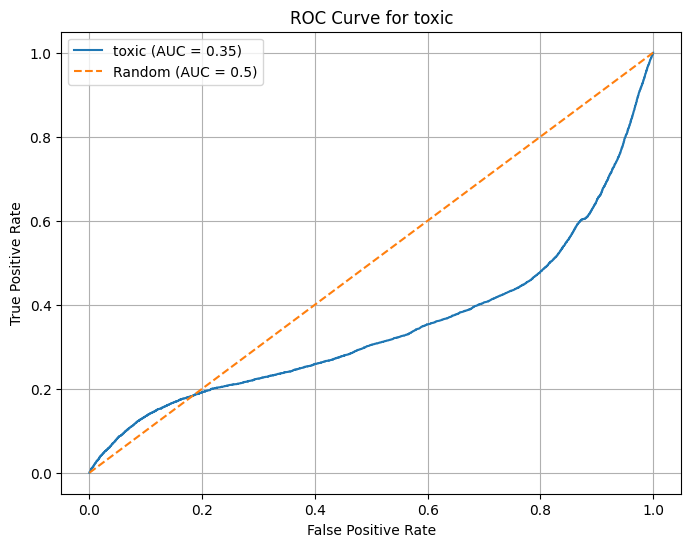

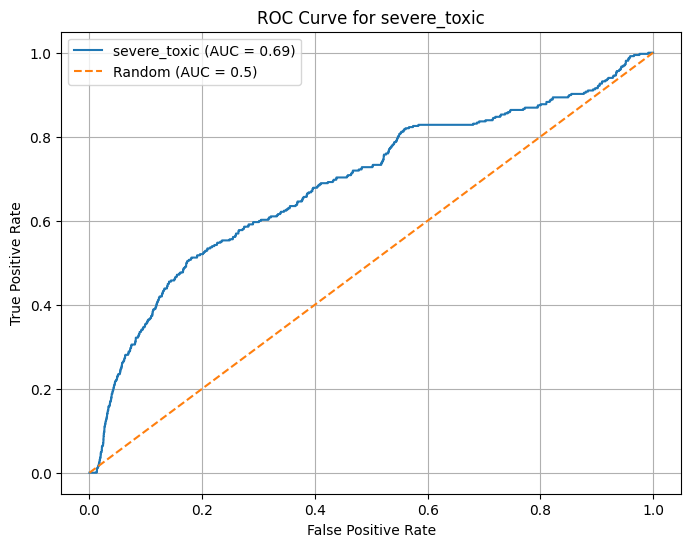

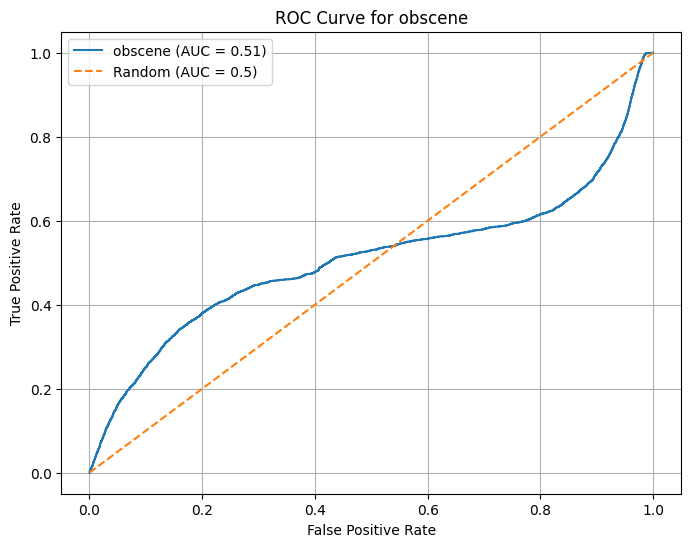

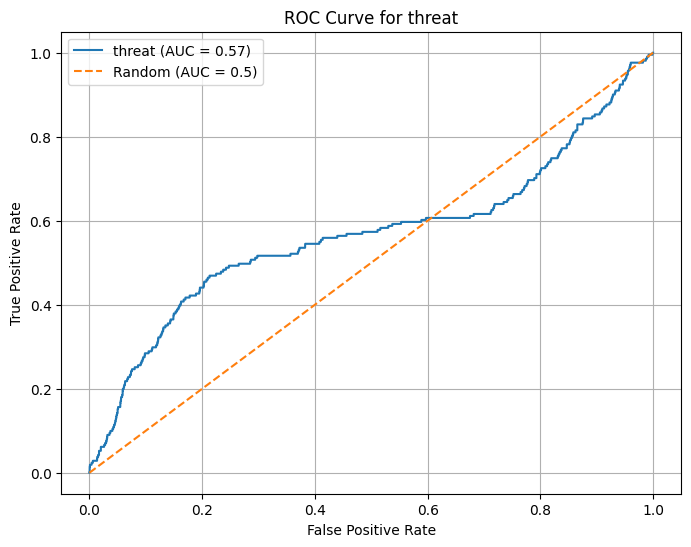

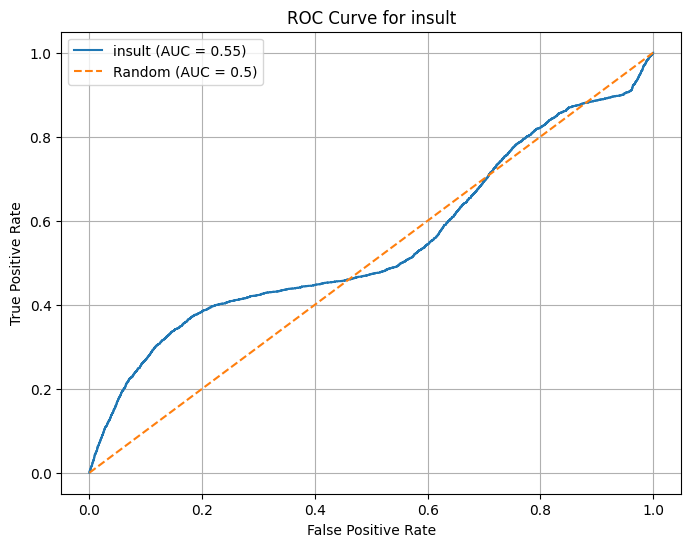

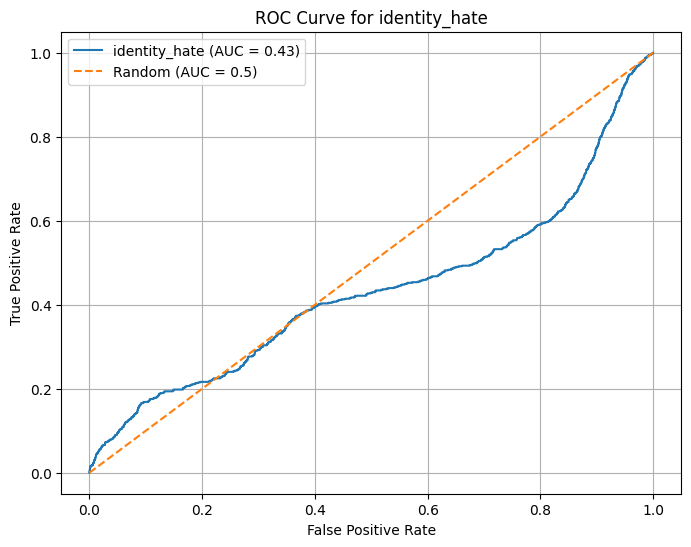

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
test_labels_binary = np.array(test_labels)

for i, class_name in enumerate(class_names):
    y_true_class = (y_test[:, i] == 1).astype(int)  # Бінарні мітки для класу i
    fpr, tpr, thresholds = roc_curve(y_true_class, predictions[:, i])
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.5)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {class_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


## 4. Confusion Matrix
Для кожного класу побудована матриця плутанини, яка відображає кількість:  
True Positives (TP): Правильно передбачені позитивні випадки.  
True Negatives (TN): Правильно передбачені негативні випадки.  
False Positives (FP): Негативні випадки, передбачені як позитивні.  
False Negatives (FN): Позитивні випадки, передбачені як негативні.  

[[    1 57887]
 [    0  6090]]


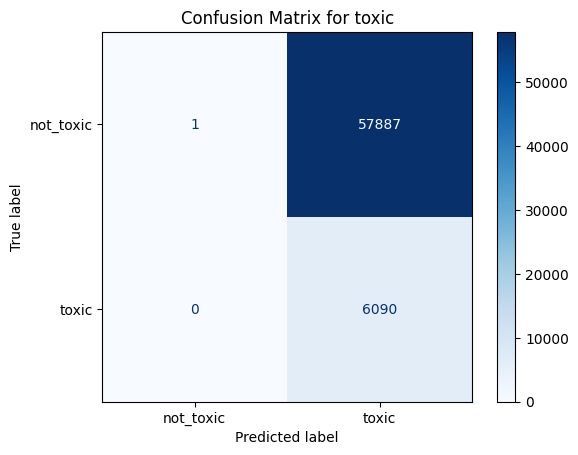

[[63611     0]
 [  367     0]]


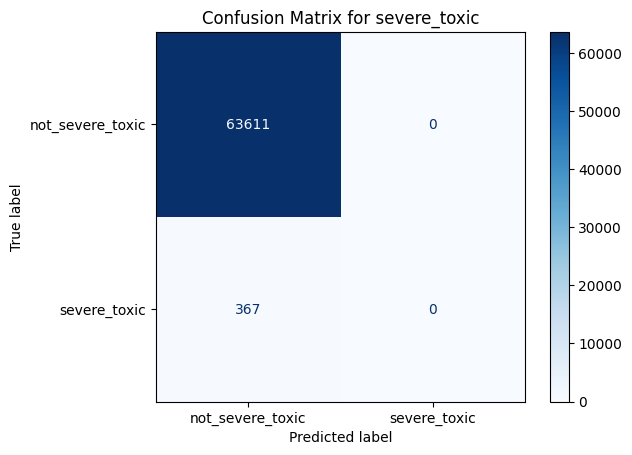

[[56463  3824]
 [ 3003   688]]


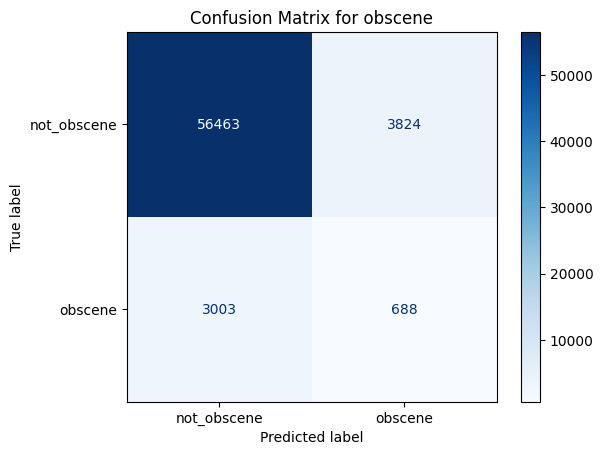

[[63752    15]
 [  211     0]]


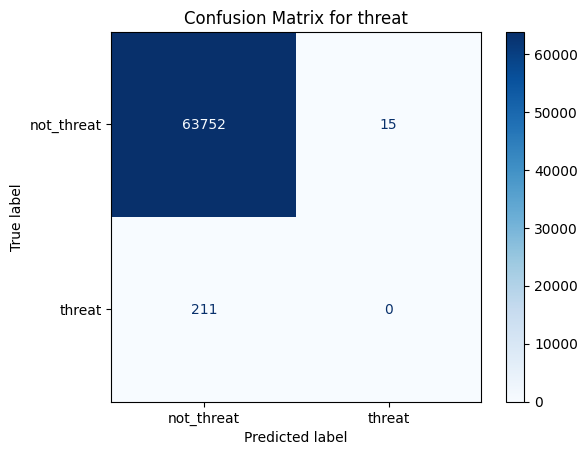

[[59593   958]
 [ 3207   220]]


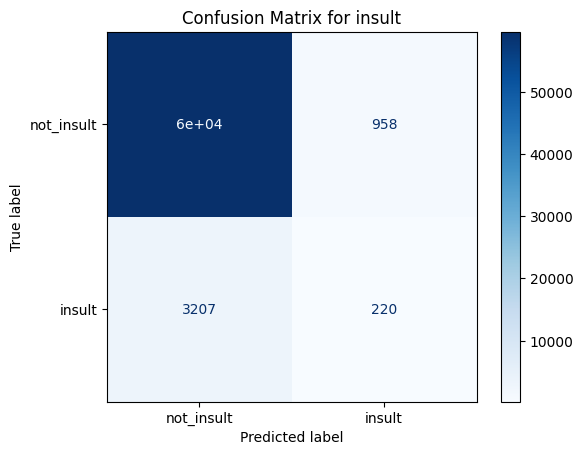

[[63250    16]
 [  710     2]]


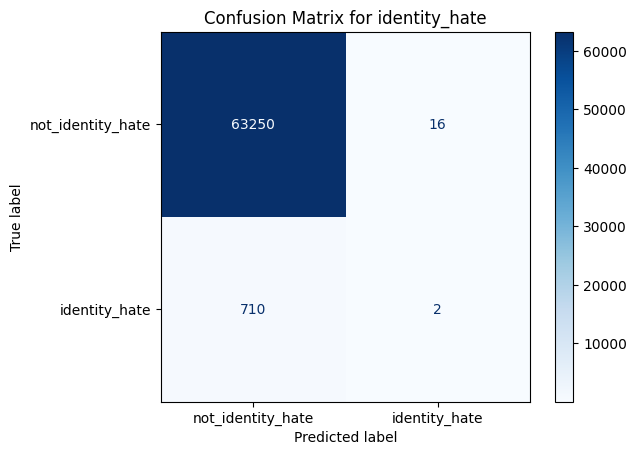

In [62]:
for i, class_name in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    cm = confusion_matrix(y_test[:, i], preds_binary[:, i])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not_{class_name}", class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()

### Висновок:
1. Confusion Matrix for toxic

Надзвичайно велика кількість FP = 6090, що вказує на те, що модель часто помилково класифікує "не токсичні" зразки як "токсичні".

2. Confusion Matrix for severe toxic

Модель не класифікує жодного зразка як "severe toxic" (TP = 0).

3. Confusion Matrix for obscene

TP = 688 досить низький, що свідчить про слабку чутливість моделі до "obscene" зразків.
FN = 3003, що означає багато пропущених випадків позитивного класу.

4. Confusion Matrix for threat

Відсутність TP (жоден зразок не класифікується правильно як "threat").  

5. Confusion Matrix for insult

Відносно низький TP = 220, що свідчить про недостатню чутливість.
FN = 3207 показує, що модель пропускає значну кількість образливих випадків.

6. Confusion Matrix for identity hate

Дуже низький TP = 2.
FN = 710 свідчить про те, що модель не здатна розпізнати "identity hate".

## 5. Історія навчання моделі

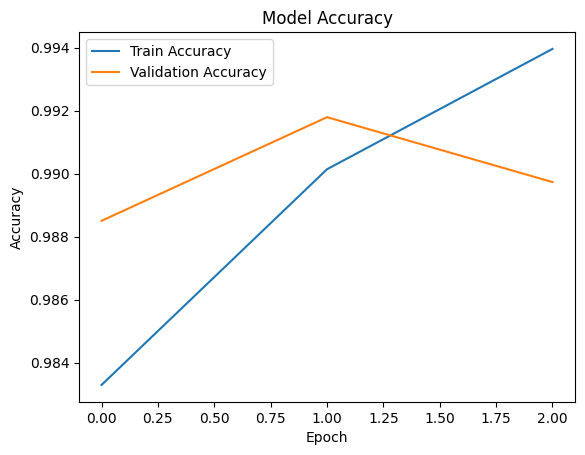

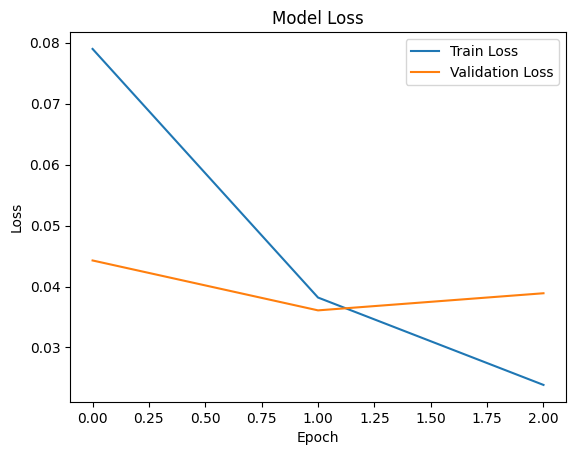

In [60]:
import json
with open('training_history_model-1.json', "r") as file:
    history = json.load(file)

if history:
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

### Висновок
Графік точності:  
Тренувальна точність (Train Accuracy): Тренувальна точність постійно зростає і досягає дуже високих значень (~0.994) до кінця епох.  
Валідаційна точність (Validation Accuracy): Спочатку також зростає, але після певного моменту (2 епоха) починає знижуватися.  
Графік втрат:  
Тренувальні втрати (Train Loss): Постійно зменшуються, що свідчить про те, що модель добре адаптується до тренувальних даних.  
Валідаційні втрати (Validation Loss): Зменшуються спочатку, але після 2 епохи починають зростати.  

Отже, модель, ймовірно, перенавчається після 2 епохи. Це видно з того, що валідаційна точність починає знижуватися, а валідаційні втрати — зростати, тоді як тренувальні метрики продовжують покращуватися.

## 6. Оцінка прогнозів на конкретних прикладах

In [61]:

threshold = 0.5
preds_binary = (predictions > threshold).astype(int)

# Виведення кількох прикладів коментарів із їхніми оцінками
for i in range(263, 267):  # Вивести 5 перших записів
    print(f"Comment {i + 1}: {test_data['cleaned_comment_text'].iloc[i]}")
    print(f"\nPredicted labels:\n-toxic={preds_binary[i, 0]}\n-severe_toxic={preds_binary[i, 1]}"
          f"\n-obscene={preds_binary[i, 2]}\n-threat={preds_binary[i, 3]}"
          f"\n-insult={preds_binary[i, 4]}\n-identity_hate={preds_binary[i, 5]}")
    print(f"\nTrue labels:\n-toxic={test_data['toxic'].iloc[i]}\n-severe_toxic={test_data['severe_toxic'].iloc[i]}, "
          f"\n-obscene={test_data['obscene'].iloc[i]}\n-threat={test_data['threat'].iloc[i]}, "
          f"\n-insult={test_data['insult'].iloc[i]}\n-identity_hate={test_data['identity_hate'].iloc[i]}")
    print("-" * 80)



Comment 264: casualt i fucked your mum and i liked it ies

Predicted labels:
-toxic=1
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0

True labels:
-toxic=1
-severe_toxic=1, 
-obscene=1
-threat=0, 
-insult=1
-identity_hate=0
--------------------------------------------------------------------------------
Comment 265: Keep in find complete lies are still nonfiction if that is the format they present themselves in Hitlers propaganda was nonfiction in that it was not a work of imagination Instead it was untrue but still had a nonfiction format The reason it was untrue was not because it was imagined but instead it was because it was a product of misinformation ignorance and what is largely considered evil

Predicted labels:
-toxic=1
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0

True labels:
-toxic=0
-severe_toxic=0, 
-obscene=0
-threat=0, 
-insult=0
-identity_hate=0
--------------------------------------------------------------------------------
Comment 

# Оцінка моделі 2

In [7]:
class BertLayer(Layer):
    def __init__(self, pretrained_model_name="bert-base-uncased", trainable=False, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained(pretrained_model_name)
        self.bert.trainable = trainable

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state

custom_objects = {'BertLayer': BertLayer}

In [13]:
try:
    model_2 = load_model('/kaggle/input/model-2/model.h5', custom_objects=custom_objects, compile=False)
    print("Модель успішно завантажена!")
except Exception as e:
    print(f"Помилка завантаження моделі: {e}")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Модель успішно завантажена!


In [17]:
#  Отримання прогнозів моделі
predictions_2 = model_2.predict({'input_ids': input_ids, 'attention_mask': attention_masks})

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 504s 249ms/step


## 1. Класифікаційний звіт

In [27]:
# Перетворення прогнозів у бінарний формат
threshold_2 = 0.5
preds_binary_2 = (predictions_2 >= threshold_2).astype(int)

# Оцінка за допомогою класифікаційного звіту
print("Classification Report:\n", classification_report(true_labels, preds_binary_2, target_names=[
    'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
]))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.10      0.93      0.18      6090
 severe_toxic       0.01      0.44      0.01       367
      obscene       0.07      0.72      0.13      3691
       threat       0.00      0.66      0.01       211
       insult       0.07      0.66      0.13      3427
identity_hate       0.02      0.47      0.03       712

    micro avg       0.05      0.77      0.10     14498
    macro avg       0.04      0.65      0.08     14498
 weighted avg       0.08      0.77      0.14     14498
  samples avg       0.05      0.08      0.05     14498

Classification Report:
                precision    recall  f1-score   support

        toxic       0.10      0.93      0.18      6090
 severe_toxic       0.01      0.44      0.01       367
      obscene       0.07      0.72      0.13      3691
       threat       0.00      0.66      0.01       211
       insult       0.07      0.66      0.13      3427
identity_hate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### Висновок

## 2. Метрика F1

F1-метрика (F1 score) - це гармонічне середнє між точністю (precision) та повнотою (recall).

In [ ]:
'''
у якості метрики обрано Ф-1 у зв'язку із незбалансованістю класів. 
Підготуємо функцію для неї
'''

import tensorflow as tf
from tensorflow.keras import backend as K

def f1_metric(y_true, y_pred):
    # Преобразуем в бинарный формат для каждого класса
    y_true = K.cast(y_true, 'int32')
    y_pred = K.cast(K.greater_equal(y_pred, 0.5), 'int32')

    # Вычисляем точность (precision) и полноту (recall)
    true_positive = K.sum(K.cast(y_true * y_pred, 'float32'))
    false_positive = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))
    false_negative = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))

    precision = true_positive / (true_positive + false_positive + K.epsilon())
    recall = true_positive / (true_positive + false_negative + K.epsilon())

    # F1-score = 2 * (precision * recall) / (precision + recall)
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    
    return f1

In [26]:
f1_score = f1_metric(tf.constant(true_labels, dtype=tf.float32), 
                     tf.constant(preds_binary_2, dtype=tf.float32))

print("F1 Score:", f1_score.numpy())

F1 Score: 0.10136425


## 3. Обчислення метрики ROC-AUC для кожного класу

In [28]:
roc_auc_scores = {
    label: roc_auc_score(true_labels[:, i], predictions_2[:, i]) for i, label in enumerate([
        'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
    ])
}
print("ROC-AUC Scores:")
for label, score in roc_auc_scores.items():
    if score == 1.0:
        explanation = "Ідеальний класифікатор."
    elif score == 0.5:
        explanation = "Випадкове вгадування."
    elif score > 0.5:
        explanation = "Модель краще, ніж випадкове вгадування."
    else:
        explanation = "Модель працює гірше, ніж випадкове вгадування."
    
    print(f"{label.capitalize():<15}: {score:.3f} - {explanation}")

ROC-AUC Scores:
Toxic          : 0.616 - Модель краще, ніж випадкове вгадування.
Severe_toxic   : 0.499 - Модель працює гірше, ніж випадкове вгадування.
Obscene        : 0.614 - Модель краще, ніж випадкове вгадування.
Threat         : 0.588 - Модель краще, ніж випадкове вгадування.
Insult         : 0.608 - Модель краще, ніж випадкове вгадування.
Identity_hate  : 0.592 - Модель краще, ніж випадкове вгадування.


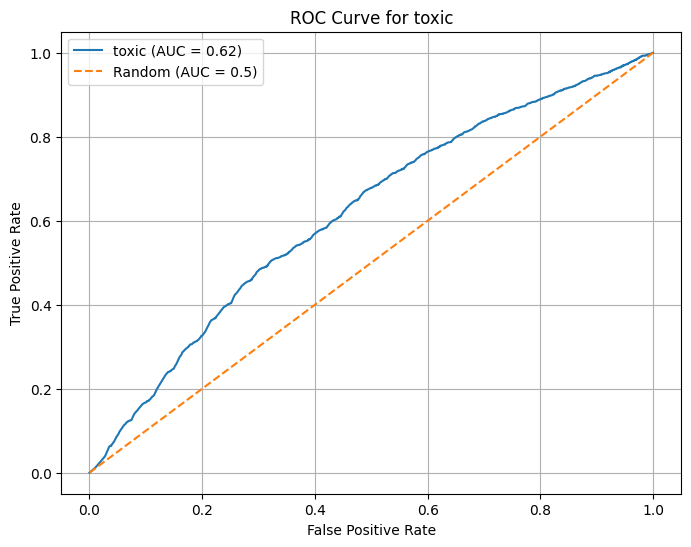

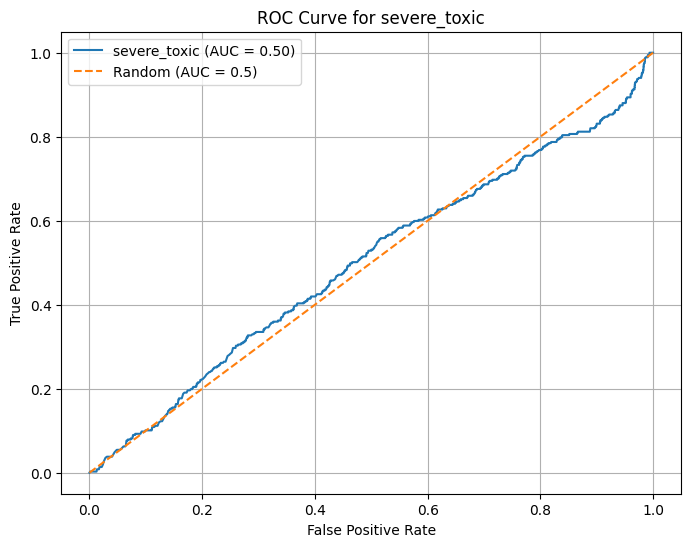

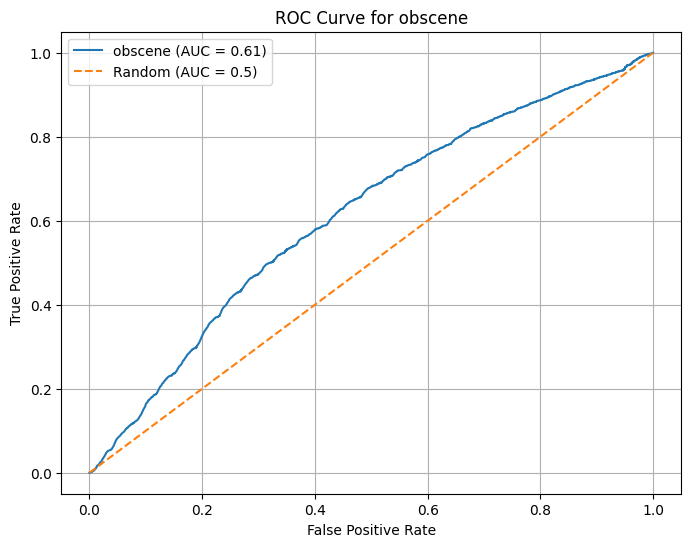

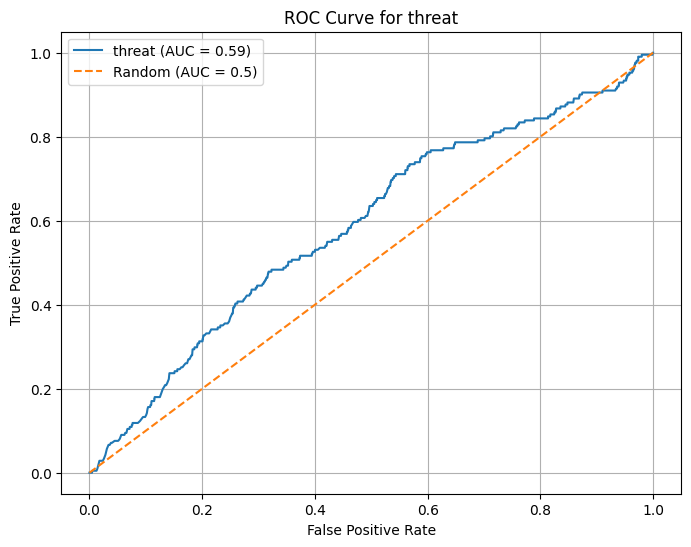

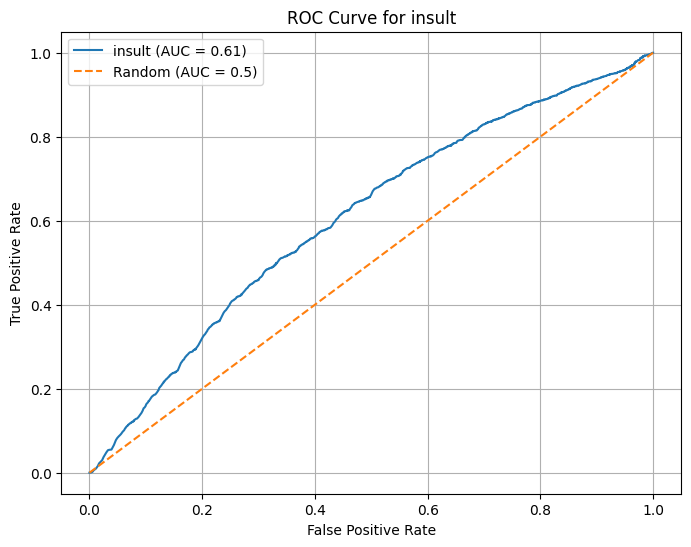

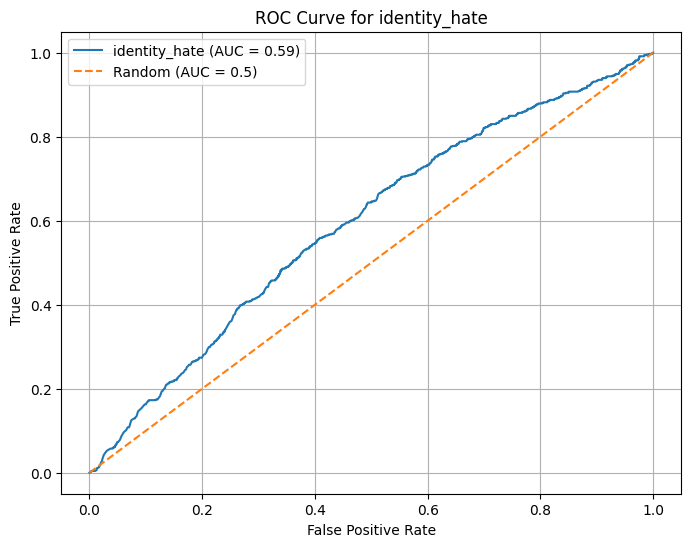

In [29]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
test_labels_binary = np.array(test_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']])

for i, class_name in enumerate(class_names):
    y_true_class = (test_labels_binary[:, i] == 1).astype(int)  # Бінарні мітки для класу i
    fpr, tpr, thresholds = roc_curve(y_true_class, predictions_2[:, i])
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.5)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {class_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


### Висновок

## 4. Confusion Matrix

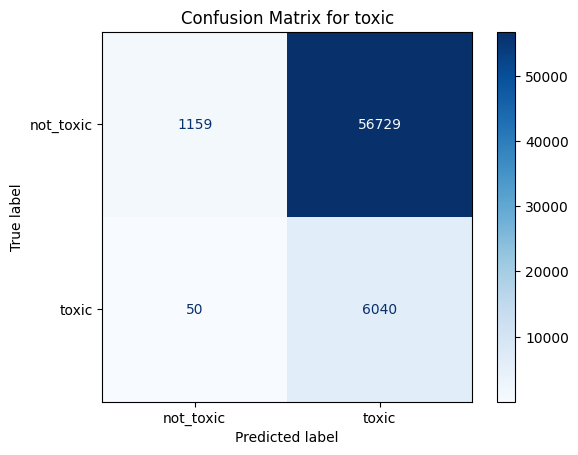

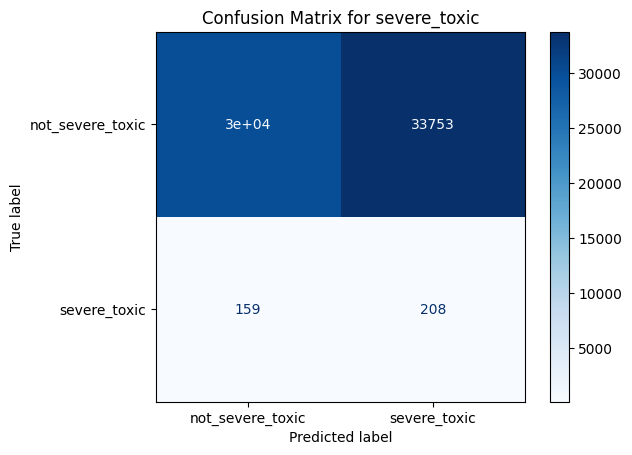

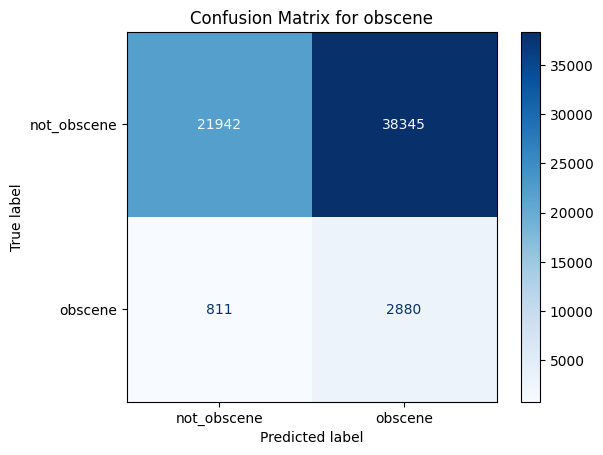

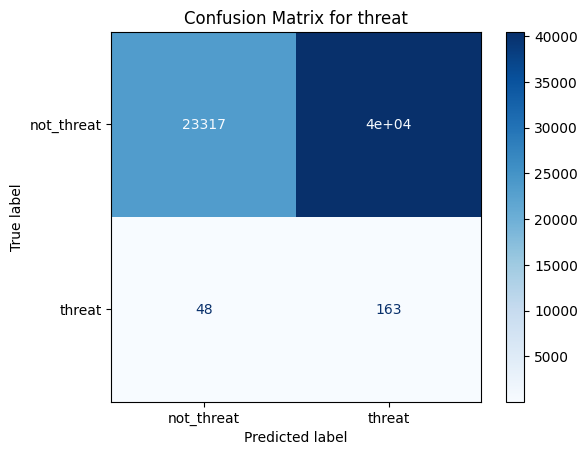

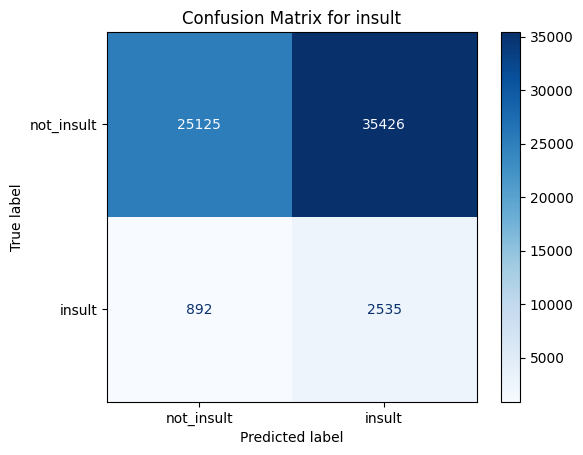

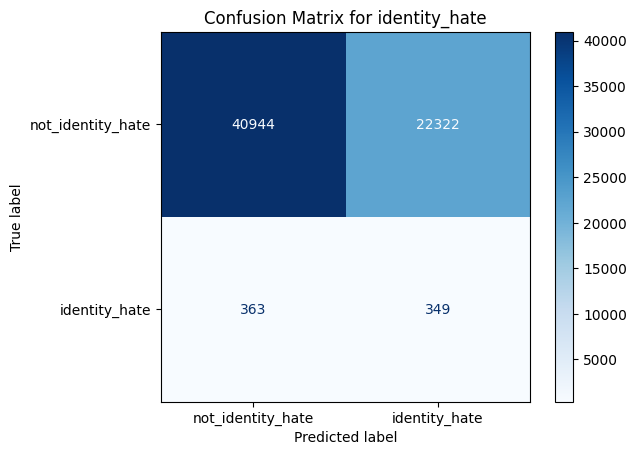

In [32]:
for i, class_name in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    cm = confusion_matrix(test_labels_binary[:, i], preds_binary_2[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not_{class_name}", class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()

### Висновок

## 5. Оцінка прогнозів на конкретних прикладах

In [33]:
# Виведення кількох прикладів коментарів із їхніми оцінками
for i in range(263, 267):  # Вивести 5 перших записів
    print(f"Comment {i + 1}: {test_data['cleaned_comment_text'].iloc[i]}")
    print(f"\nPredicted labels:\n-toxic={preds_binary_2[i, 0]}\n-severe_toxic={preds_binary_2[i, 1]}"
          f"\n-obscene={preds_binary_2[i, 2]}\n-threat={preds_binary_2[i, 3]}"
          f"\n-insult={preds_binary_2[i, 4]}\n-identity_hate={preds_binary_2[i, 5]}")
    print(f"\nTrue labels:\n-toxic={test_data['toxic'].iloc[i]}\n-severe_toxic={test_data['severe_toxic'].iloc[i]}, "
          f"\n-obscene={test_data['obscene'].iloc[i]}\n-threat={test_data['threat'].iloc[i]}, "
          f"\n-insult={test_data['insult'].iloc[i]}\n-identity_hate={test_data['identity_hate'].iloc[i]}")
    print("-" * 80)



Comment 264: casualt i fucked your mum and i liked it ies

Predicted labels:
-toxic=1
-severe_toxic=1
-obscene=1
-threat=1
-insult=1
-identity_hate=0

True labels:
-toxic=1
-severe_toxic=1, 
-obscene=1
-threat=0, 
-insult=1
-identity_hate=0
--------------------------------------------------------------------------------
Comment 265: Keep in find complete lies are still nonfiction if that is the format they present themselves in Hitlers propaganda was nonfiction in that it was not a work of imagination Instead it was untrue but still had a nonfiction format The reason it was untrue was not because it was imagined but instead it was because it was a product of misinformation ignorance and what is largely considered evil

Predicted labels:
-toxic=1
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0

True labels:
-toxic=0
-severe_toxic=0, 
-obscene=0
-threat=0, 
-insult=0
-identity_hate=0
--------------------------------------------------------------------------------
Comment 

# Оцінка моделі 3

In [8]:
try:
    model_3 = load_model('/kaggle/input/model-3-1/model_3.1.h5', custom_objects=custom_objects, compile=False)
    print("Модель успішно завантажена!")
except Exception as e:
    print(f"Помилка завантаження моделі: {e}")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Модель успішно завантажена!


In [9]:
#  Отримання прогнозів моделі
predictions_3 = model_3.predict({'input_ids': input_ids, 'attention_mask': attention_masks})

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 545s 269ms/step


## 1. Класифікаційний звіт

In [19]:
# Додання класу нетоксичних коментарів (всі нулі)
all_zeros_class = np.all(true_labels == 0, axis=1).astype(int)  
y_test_expanded = np.hstack((true_labels, all_zeros_class.reshape(-1, 1))) 

# Перетворення прогнозів у бінарний формат
threshold_3 = 0.5
preds_binary_3 = (predictions_3 >= threshold_3).astype(int)

# Додання класу нетоксичних коментарів у прогноз
predicted_all_zeros_class = np.all(preds_binary_3 == 0, axis=1)
predicted_classes_expanded_test = np.hstack((preds_binary_3, predicted_all_zeros_class.reshape(-1, 1)))

# Оцінка за допомогою класифікаційного звіту
print("Classification Report:\n", classification_report(y_test_expanded, predicted_classes_expanded_test, target_names=[
    'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic'
]))

Classification Report:
                precision    recall  f1-score   support

        toxic       0.00      0.00      0.00      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.00      0.00      0.00      3691
       threat       0.00      0.00      0.00       211
       insult       0.00      0.00      0.00      3427
identity_hate       0.00      0.00      0.00       712
    non_toxic       0.90      1.00      0.95     57735

    micro avg       0.90      0.80      0.85     72233
    macro avg       0.13      0.14      0.14     72233
 weighted avg       0.72      0.80      0.76     72233
  samples avg       0.90      0.90      0.90     72233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Метрика F1

In [20]:
f1_score = f1_metric(tf.constant(y_test_expanded, dtype=tf.float32), 
                     tf.constant(predicted_classes_expanded_test, dtype=tf.float32))

print("F1 Score:", f1_score.numpy())

F1 Score: 0.84772885


## 3. Обчислення метрики ROC-AUC для кожного класу

In [22]:
from sklearn.metrics import classification_report, roc_auc_score
roc_auc_scores = {
    label: roc_auc_score(y_test_expanded[:, i], predicted_classes_expanded_test[:, i]) for i, label in enumerate([
        'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic'
    ])
}
print("ROC-AUC Scores:")
for label, score in roc_auc_scores.items():
    if score == 1.0:
        explanation = "Ідеальний класифікатор."
    elif score == 0.5:
        explanation = "Випадкове вгадування."
    elif score > 0.5:
        explanation = "Модель краще, ніж випадкове вгадування."
    else:
        explanation = "Модель працює гірше, ніж випадкове вгадування."
    
    print(f"{label.capitalize():<15}: {score:.3f} - {explanation}")

ROC-AUC Scores:
Toxic          : 0.500 - Випадкове вгадування.
Severe_toxic   : 0.500 - Випадкове вгадування.
Obscene        : 0.500 - Випадкове вгадування.
Threat         : 0.500 - Випадкове вгадування.
Insult         : 0.500 - Випадкове вгадування.
Identity_hate  : 0.500 - Випадкове вгадування.
Non_toxic      : 0.500 - Випадкове вгадування.


## 4. Confusion Matrix

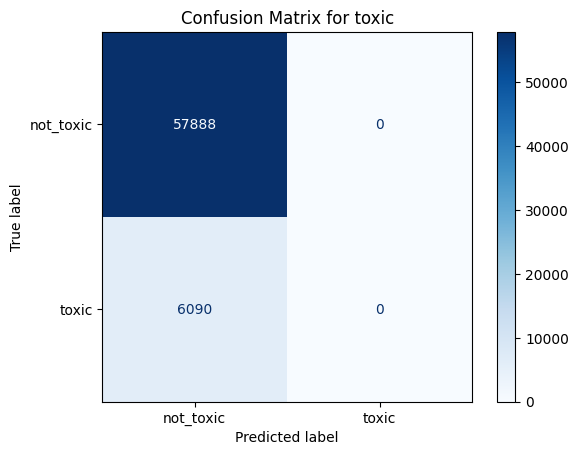

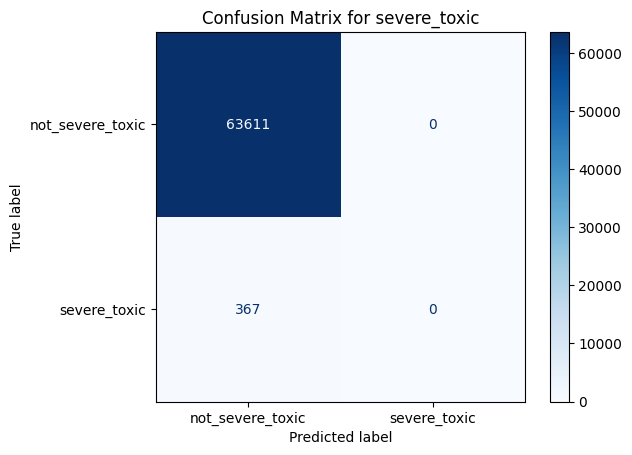

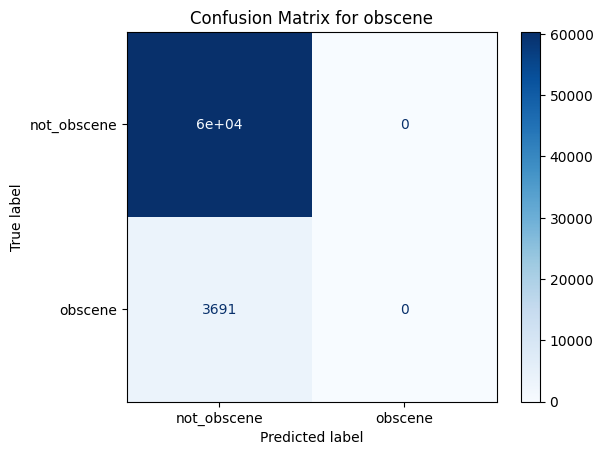

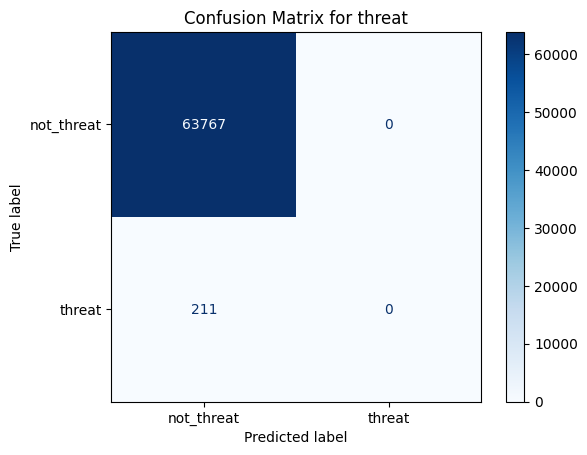

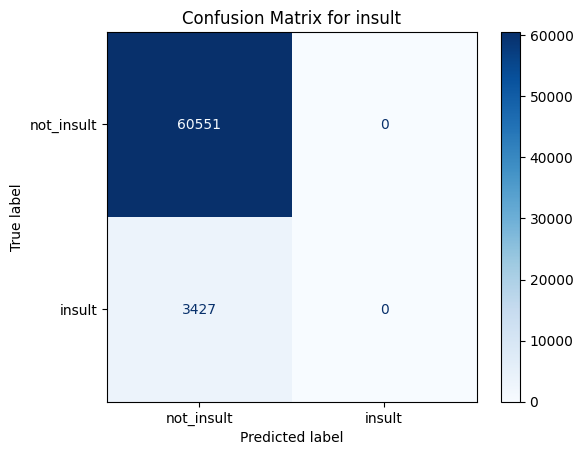

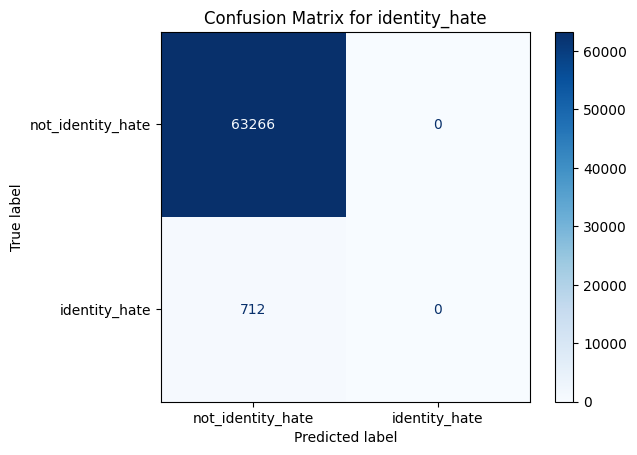

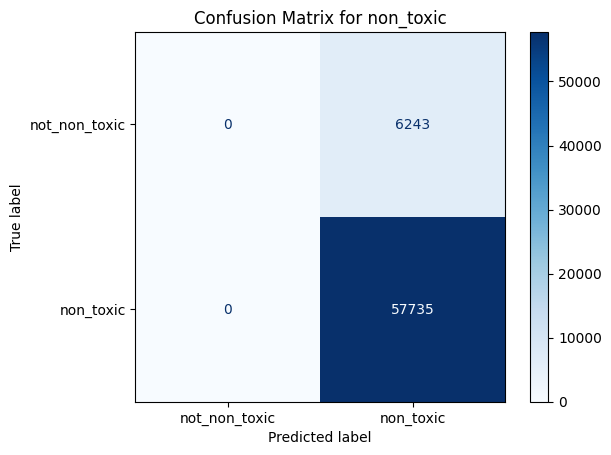

In [30]:
for i, class_name in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']):
    cm = confusion_matrix(y_test_expanded[:, i], predicted_classes_expanded_test[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not_{class_name}", class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()

## 5. Історія навчання моделі

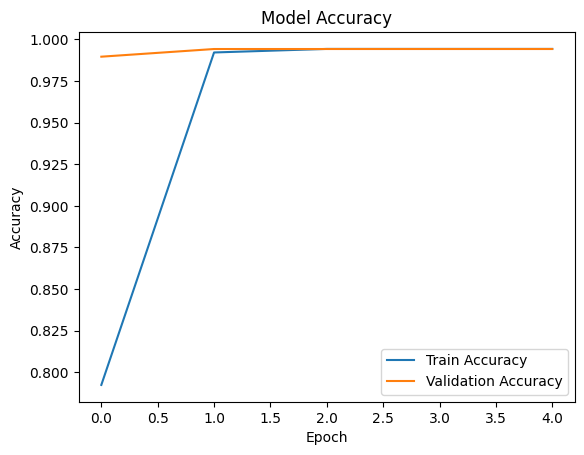

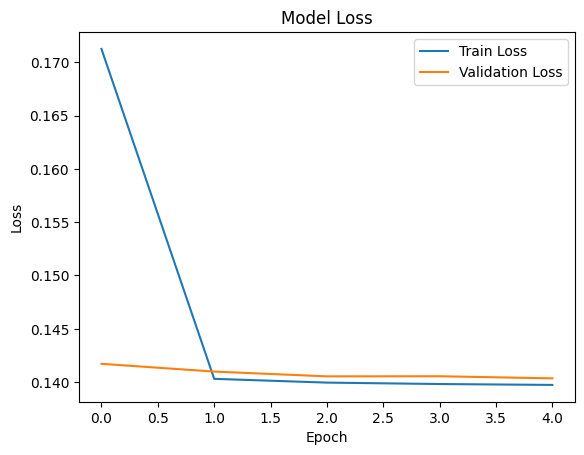

In [37]:
import json
with open('/kaggle/input/model-history-3/training_history_model-3.1.json', "r") as file:
    history = json.load(file)

if history:
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

## 6. Оцінка прогнозів на конкретних прикладів

In [36]:
# Виведення кількох прикладів коментарів із їхніми оцінками
for i in range(263, 267):  # Вивести 5 перших записів
    print(f"Comment {i + 1}: {test_data['cleaned_comment_text'].iloc[i]}")
    print(f"\nPredicted labels:\n-toxic={predicted_classes_expanded_test[i, 0]}\n-severe_toxic={predicted_classes_expanded_test[i, 1]}"
          f"\n-obscene={predicted_classes_expanded_test[i, 2]}\n-threat={predicted_classes_expanded_test[i, 3]}"
          f"\n-insult={predicted_classes_expanded_test[i, 4]}\n-identity_hate={predicted_classes_expanded_test[i, 5]}\n-non_toxic={predicted_classes_expanded_test[i, 6]}")
    print(f"\nTrue labels:\n-toxic={y_test_expanded[i, 0]}\n-severe_toxic={y_test_expanded[i, 1]}, "
          f"\n-obscene={y_test_expanded[i, 2]}\n-threat={y_test_expanded[i, 3]}, "
          f"\n-insult={y_test_expanded[i, 4]}\n-identity_hate={y_test_expanded[i, 5]}\n-non_toxic={y_test_expanded[i, 6]}")
    print("-" * 80)



Comment 264: casualt i fucked your mum and i liked it ies

Predicted labels:
-toxic=0
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0
-non_toxic=1

True labels:
-toxic=1
-severe_toxic=1, 
-obscene=1
-threat=0, 
-insult=1
-identity_hate=0
-non_toxic=0
--------------------------------------------------------------------------------
Comment 265: Keep in find complete lies are still nonfiction if that is the format they present themselves in Hitlers propaganda was nonfiction in that it was not a work of imagination Instead it was untrue but still had a nonfiction format The reason it was untrue was not because it was imagined but instead it was because it was a product of misinformation ignorance and what is largely considered evil

Predicted labels:
-toxic=0
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0
-non_toxic=1

True labels:
-toxic=0
-severe_toxic=0, 
-obscene=0
-threat=0, 
-insult=0
-identity_hate=0
-non_toxic=1
-------------------------------------

# Оцінка моделі 4

In [38]:
try:
    model_4_1 = load_model(
        '/kaggle/input/model-4-1/model_3_1_fin.h5', 
        custom_objects=custom_objects, 
        compile=False)
    print("Модель успішно завантажена!")
except Exception as e:
    print(f"Помилка завантаження моделі: {e}")

try:
    model_4_2 = load_model(
        '/kaggle/input/model-4-2/model_3_3_fin.h5', 
        custom_objects=custom_objects, 
        compile=False)
    print("Модель успішно завантажена!")
except Exception as e:
    print(f"Помилка завантаження моделі: {e}")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Модель успішно завантажена!


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Модель успішно завантажена!


In [39]:
#  Отримання прогнозів моделі
predictions_4_1 = model_4_1.predict({
    'input_ids': input_ids, 
    'attention_mask': attention_masks
})

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 562s 278ms/step


In [37]:
# Прогнози мультиміткової моделі на валідаціних даних
predictions_4_2 = model_4_2.predict({
    'input_ids': input_ids, 
    'attention_mask': attention_masks}
)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 491s 244ms/step


In [41]:
threshold_4 = 0.4
binary_predictions = (predictions_4_1 > threshold_4).astype(int)  # Перетворення в 0 або 1

# Розподіл прогнозів бінарної моделі
unique, counts = np.unique(binary_predictions, return_counts=True)
binary_distribution = dict(zip(unique, counts))

print("Розподіл міток:")
print(f"Нетоксичні (1): {binary_distribution.get(1, 0)}")
print(f"Токсичні (0): {binary_distribution.get(0, 0)}")

Розподіл міток:
Нетоксичні (1): 56745
Токсичні (0): 7233


In [39]:
# Перетворюємо прогнози на бінарні мітки
multilabel_predictions = (predictions_4_2 > 0.8).astype(int)
# Сумуємо значення для кожної мітки
toxic_label_counts = multilabel_predictions.sum(axis=0)

# Мітки токсичності
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

print("\nРозподіл міток багатоміткової моделі:")
for i, label in enumerate(labels):
    print(f"{label}: {toxic_label_counts[i]}")


Розподіл міток багатоміткової моделі:
toxic: 33235
severe_toxic: 21695
obscene: 26580
threat: 24612
insult: 25281
identity_hate: 19690


In [42]:
final_predictions = []
# Проходимо по кожному прикладу даних
for i in range(len(input_ids)):
    binary_prediction = binary_predictions[i].item()  # Прогноз бінарної моделі для поточного приклада

    if binary_prediction == 1:
        # Якщо коментар не токсичний, формуємо фінальний вектор
        final_predictions.append([0, 0, 0, 0, 0, 0, 1])  # Всі нулі + 1 на останьому індексі
    else:
        # Якщо коментар токсичний, формуємо прогноз мультимітковою моделлю
        toxic_input_ids = input_ids[i].reshape(1, -1)  # Приклад в форматі (1, 128)
        toxic_attention_mask = attention_masks[i].reshape(1, -1)

        # Прогноз мультимітковою моделлю
        multilabel_prediction = model_4_2.predict(
            {'input_ids': toxic_input_ids, 'attention_mask': toxic_attention_mask},
            batch_size=1,
            verbose=0  # Отключение вывода
        )

        # Перетворення прогнозів
        multilabel_result = (multilabel_prediction > 0.5).astype(int).flatten().tolist()
        multilabel_result.append(0)  # Дадаємо 0 в останній індекс 

        # Додаємо результат у фінальні прогнози
        final_predictions.append(multilabel_result)

# Перетворення фінальних прогнозів в numpy-масив
final_predictions = np.array(final_predictions)

In [43]:
all_zeros_class = np.all(true_labels == 0, axis=1).astype(int)  
y_test_expanded = np.hstack((true_labels, all_zeros_class.reshape(-1, 1)))  

## 1. Класифікаційний звіт

In [45]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
# Оцінка моделі
print("\nClassification Report for model 4:\n")
print(classification_report(
    y_test_expanded, 
    final_predictions, 
    target_names=[
        "toxic", 
        "severe_toxic", 
        "obscene", 
        "threat", 
        "insult", 
        "identity_hate", 
        "non_toxic"
]))

# Побудова багатоміткової матриці помилок
conf_matrices = multilabel_confusion_matrix(y_test_expanded, final_predictions)


Classification Report for model 4:

               precision    recall  f1-score   support

        toxic       0.15      0.18      0.17      6090
 severe_toxic       0.01      0.11      0.01       367
      obscene       0.09      0.18      0.12      3691
       threat       0.00      0.15      0.01       211
       insult       0.09      0.19      0.12      3427
identity_hate       0.02      0.18      0.03       712
    non_toxic       0.91      0.89      0.90     57735

    micro avg       0.54      0.75      0.63     72233
    macro avg       0.18      0.27      0.19     72233
 weighted avg       0.75      0.75      0.75     72233
  samples avg       0.81      0.82      0.82     72233



## 2. Метрика F-1

In [46]:
f1_score = f1_metric(tf.constant(y_test_expanded, dtype=tf.float32), 
                     tf.constant(final_predictions, dtype=tf.float32))

print("F1 Score:", f1_score.numpy())

F1 Score: 0.6294611


## 3. Обчислення метрики ROC-AUC для кожного класу

In [48]:
roc_auc_scores = {
    label: roc_auc_score(y_test_expanded[:, i], final_predictions[:, i]) for i, label in enumerate([
        'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic'
    ])
}
print("ROC-AUC Scores:")
for label, score in roc_auc_scores.items():
    if score == 1.0:
        explanation = "Ідеальний класифікатор."
    elif score > 0.9:
        explanation = "Майже ідеальний класифікатор"
    elif score == 0.5:
        explanation = "Випадкове вгадування."
    elif score > 0.5:
        explanation = "Модель краще, ніж випадкове вгадування."
    else:
        explanation = "Модель працює гірше, ніж випадкове вгадування."
    
    print(f"{label.capitalize():<15}: {score:.3f} - {explanation}")

ROC-AUC Scores:
Toxic          : 0.538 - Модель краще, ніж випадкове вгадування.
Severe_toxic   : 0.498 - Модель працює гірше, ніж випадкове вгадування.
Obscene        : 0.537 - Модель краще, ніж випадкове вгадування.
Threat         : 0.519 - Модель краще, ніж випадкове вгадування.
Insult         : 0.539 - Модель краще, ніж випадкове вгадування.
Identity_hate  : 0.533 - Модель краще, ніж випадкове вгадування.
Non_toxic      : 0.538 - Модель краще, ніж випадкове вгадування.


## 4. Confusion Matrix

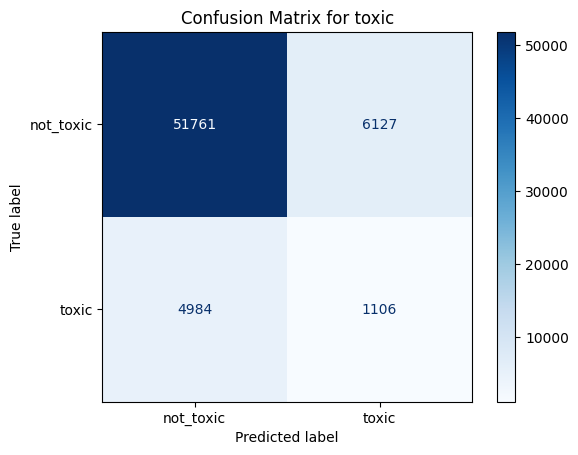

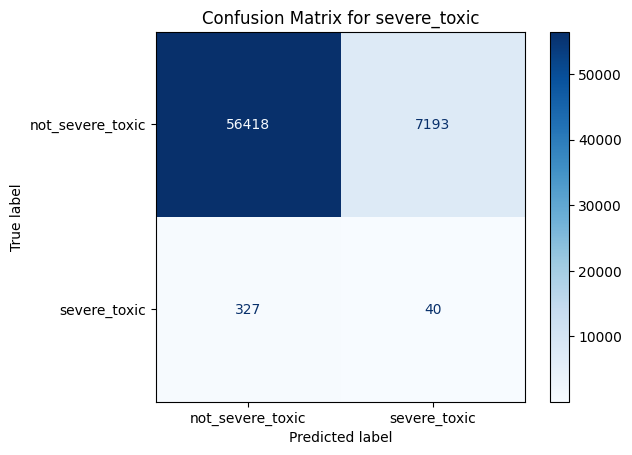

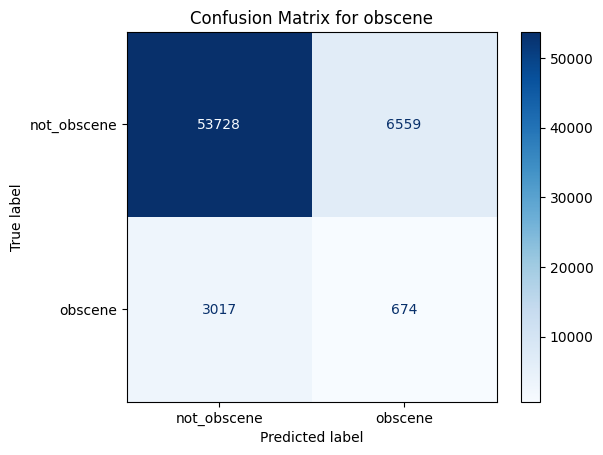

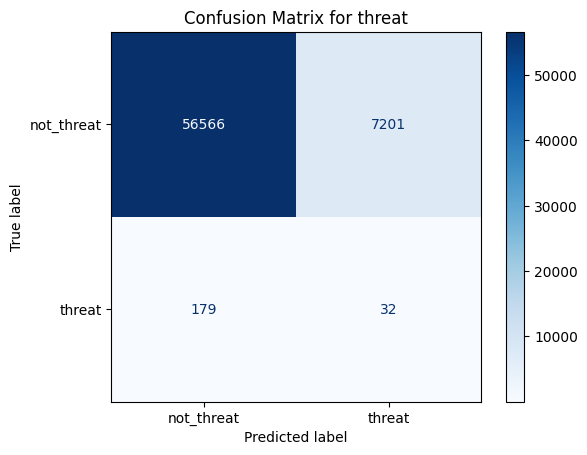

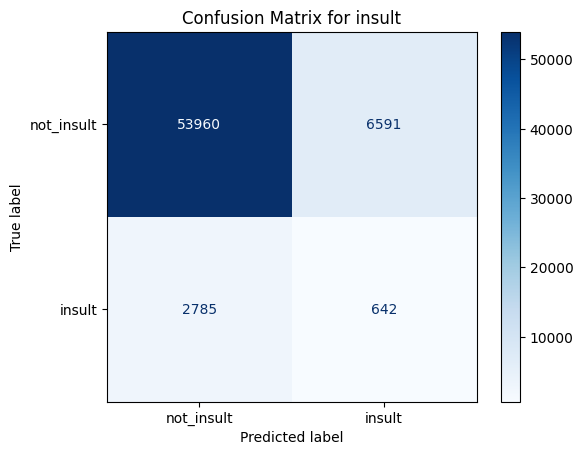

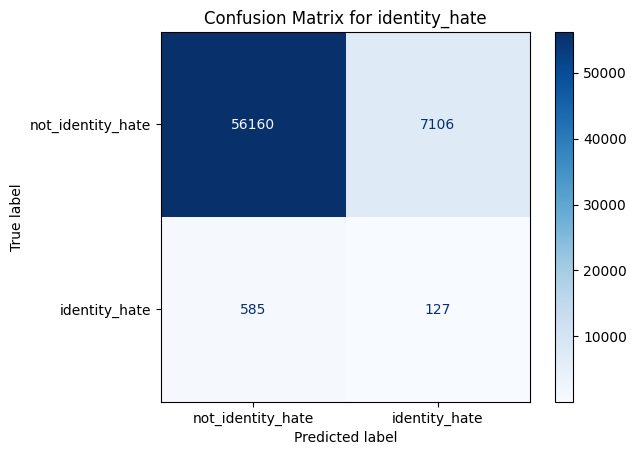

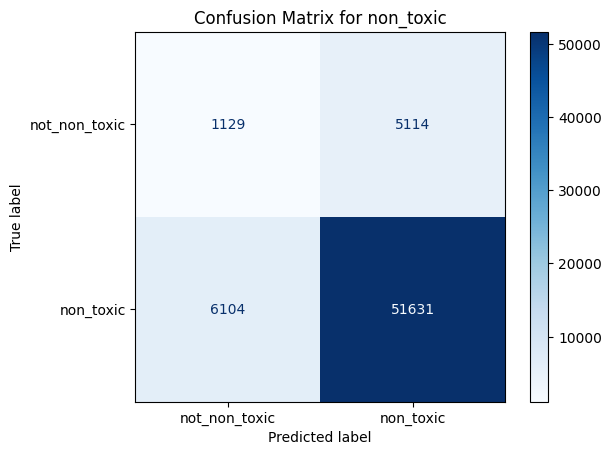

In [50]:
for i, class_name in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']):
    cm = confusion_matrix(y_test_expanded[:, i], final_predictions[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not_{class_name}", class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()

## 5. Історія навчання

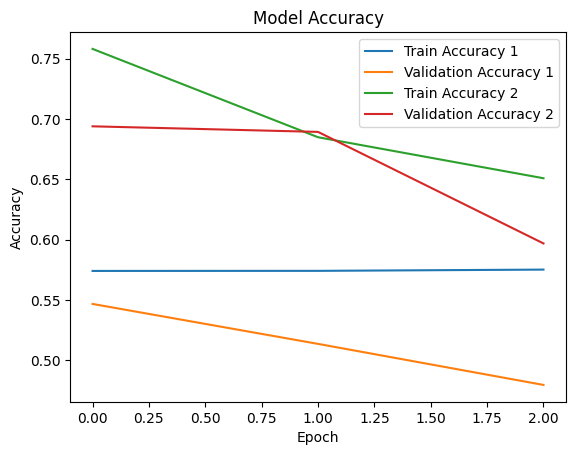

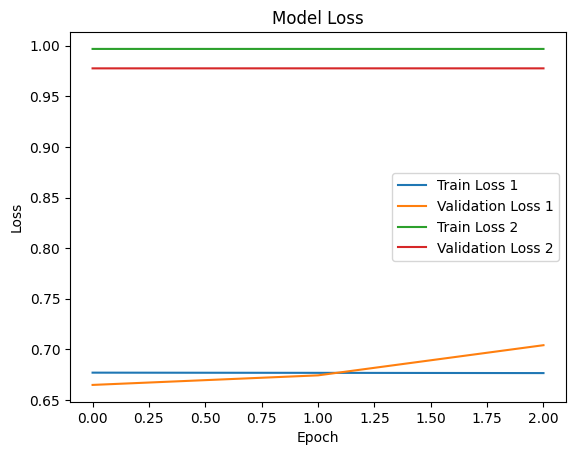

In [56]:
import json
with open('/kaggle/input/model-history-3-1/history_3_1_fin.json', "r") as file:
    history_1 = json.load(file)

with open('/kaggle/input/model-history-3-3/history_3_3_fin.json', "r") as file:
    history_2 = json.load(file)

if history:
    plt.plot(history_1['accuracy'], label='Train Accuracy 1')
    plt.plot(history_1['val_accuracy'], label='Validation Accuracy 1')
    plt.plot(history_2['accuracy'], label='Train Accuracy 2')
    plt.plot(history_2['val_accuracy'], label='Validation Accuracy 2')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

    plt.plot(history_1['loss'], label='Train Loss 1')
    plt.plot(history_1['val_loss'], label='Validation Loss 1')
    plt.plot(history_2['loss'], label='Train Loss 2')
    plt.plot(history_2['val_loss'], label='Validation Loss 2')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

## 6. Оцінка прогнозів на конкретних прикладах

In [52]:
# Виведення кількох прикладів коментарів із їхніми оцінками
for i in range(263, 267):  # Вивести 5 перших записів
    print(f"Comment {i + 1}: {test_data['cleaned_comment_text'].iloc[i]}")
    print(f"\nPredicted labels:\n-toxic={final_predictions[i, 0]}\n-severe_toxic={final_predictions[i, 1]}"
          f"\n-obscene={final_predictions[i, 2]}\n-threat={final_predictions[i, 3]}"
          f"\n-insult={final_predictions[i, 4]}\n-identity_hate={final_predictions[i, 5]}\n-non_toxic={final_predictions[i, 6]}")
    print(f"\nTrue labels:\n-toxic={y_test_expanded[i, 0]}\n-severe_toxic={y_test_expanded[i, 1]}, "
          f"\n-obscene={y_test_expanded[i, 2]}\n-threat={y_test_expanded[i, 3]}, "
          f"\n-insult={y_test_expanded[i, 4]}\n-identity_hate={y_test_expanded[i, 5]}\n-non_toxic={y_test_expanded[i, 6]}")
    print("-" * 80)



Comment 264: casualt i fucked your mum and i liked it ies

Predicted labels:
-toxic=0
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0
-non_toxic=1

True labels:
-toxic=1
-severe_toxic=1, 
-obscene=1
-threat=0, 
-insult=1
-identity_hate=0
-non_toxic=0
--------------------------------------------------------------------------------
Comment 265: Keep in find complete lies are still nonfiction if that is the format they present themselves in Hitlers propaganda was nonfiction in that it was not a work of imagination Instead it was untrue but still had a nonfiction format The reason it was untrue was not because it was imagined but instead it was because it was a product of misinformation ignorance and what is largely considered evil

Predicted labels:
-toxic=0
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0
-non_toxic=1

True labels:
-toxic=0
-severe_toxic=0, 
-obscene=0
-threat=0, 
-insult=0
-identity_hate=0
-non_toxic=1
-------------------------------------

# Оцінка моделі 5

In [1]:
from transformers import TFBertModel, TFBertForSequenceClassification
import tensorflow as tf

try:
    model_5 = tf.keras.models.load_model('/kaggle/input/model-5/model-5.h5', compile=False)
    print("Модель успішно завантажена!")
except Exception as e:
    print(f"Помилка завантаження моделі: {e}")

Модель успішно завантажена!


In [5]:
#  Отримання прогнозів моделі
predictions_5 = model_5.predict({'input_ids': input_ids, 'attention_mask': attention_masks})

2000/2000 [==============================] - 661s 329ms/step


## 1. Класифікаційний звіт

In [6]:
all_zeros_class = np.all(true_labels == 0, axis=1).astype(int)  
y_test_expanded = np.hstack((true_labels, all_zeros_class.reshape(-1, 1)))  

In [7]:
# Перетворення прогнозів у бінарний формат
threshold_5 = 0.5
preds_binary_5 = (predictions_5 >= threshold_5).astype(int)

print("Classification Report for model 5:\n", classification_report(
    y_test_expanded, 
    preds_binary_5, 
    target_names=[
        'toxic', 
        'severe_toxic', 
        'obscene', 
        'threat', 
        'insult', 
        'identity_hate',
        'non_toxic'
]))

Classification Report for model 5:
                precision    recall  f1-score   support

        toxic       0.61      0.83      0.70      6090
 severe_toxic       0.28      0.48      0.35       367
      obscene       0.62      0.78      0.69      3691
       threat       0.46      0.59      0.52       211
       insult       0.63      0.74      0.68      3427
identity_hate       0.57      0.59      0.58       712
    non_toxic       0.99      0.92      0.95     57735

    micro avg       0.89      0.89      0.89     72233
    macro avg       0.59      0.70      0.64     72233
 weighted avg       0.91      0.89      0.90     72233
  samples avg       0.90      0.90      0.89     72233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Висновок
Модель демонструє високу ефективність на найбільш поширеному класі нетоксичних коментарів (non_toxic), але її продуктивність значно нижча для менш представлених класів, таких як severe_toxic та threat. Micro average і weighted average демонструють хорошу продуктивність, але macro average показує, що є проблеми з менш поширеними класами, що вказує на незбалансованість.

## 2. Метрика F1

In [10]:
f1_score = f1_metric(tf.constant(y_test_expanded, dtype=tf.float32), 
                     tf.constant(preds_binary_5, dtype=tf.float32))

print("F1 Score:", f1_score.numpy())

F1 Score: 0.8872056


### Висновок
F1-міра з усіх модель є найкращою для моделі 5, бо значення близьке до 1, що вказує на те, що модель добре виконує класифікацію, збалансовуючи точність і повноту.

## 3. Обчислення метрики ROC-AUC для кожного класу

In [11]:
roc_auc_scores = {
    label: roc_auc_score(y_test_expanded[:, i], predictions_5[:, i]) for i, label in enumerate([
        'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic'
    ])
}
print("ROC-AUC Scores:")
for label, score in roc_auc_scores.items():
    if score == 1.0:
        explanation = "Ідеальний класифікатор."
    elif score > 0.9:
        explanation = "Майже ідеальний класифікатор"
    elif score == 0.5:
        explanation = "Випадкове вгадування."
    elif score > 0.5:
        explanation = "Модель краще, ніж випадкове вгадування."
    else:
        explanation = "Модель працює гірше, ніж випадкове вгадування."
    
    print(f"{label.capitalize():<15}: {score:.3f} - {explanation}")

ROC-AUC Scores:
Toxic          : 0.967 - Майже ідеальний класифікатор
Severe_toxic   : 0.983 - Майже ідеальний класифікатор
Obscene        : 0.976 - Майже ідеальний класифікатор
Threat         : 0.989 - Майже ідеальний класифікатор
Insult         : 0.975 - Майже ідеальний класифікатор
Identity_hate  : 0.985 - Майже ідеальний класифікатор
Non_toxic      : 0.967 - Майже ідеальний класифікатор


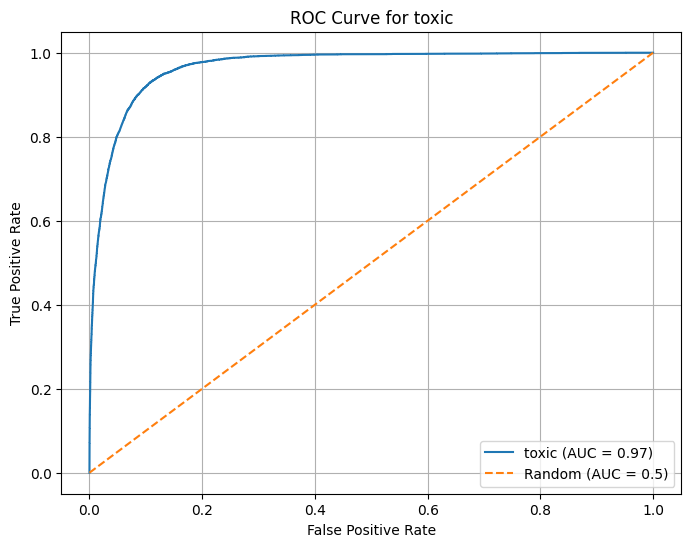

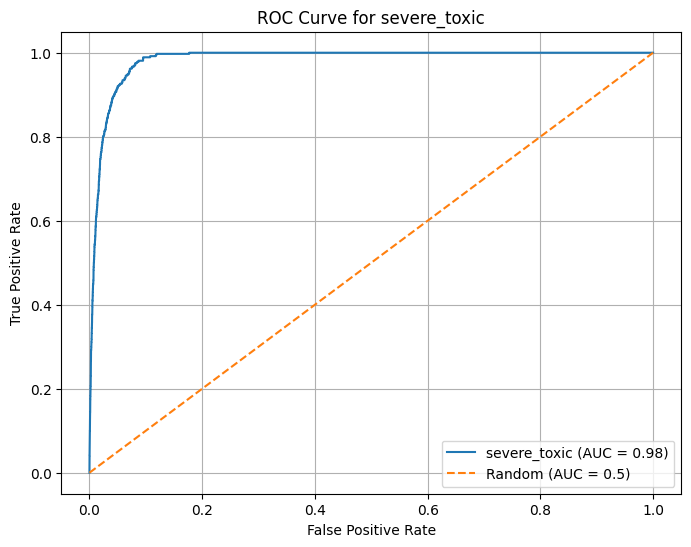

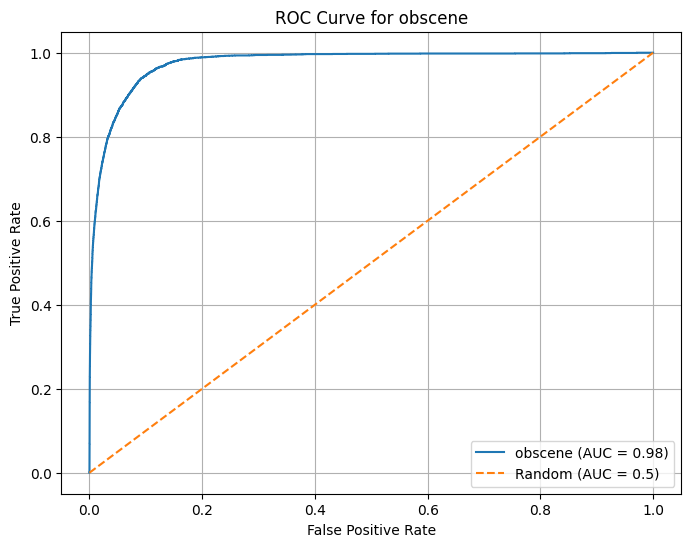

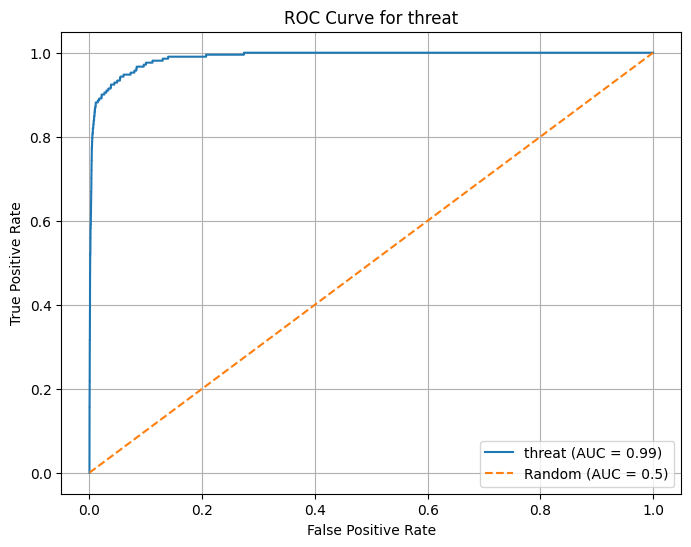

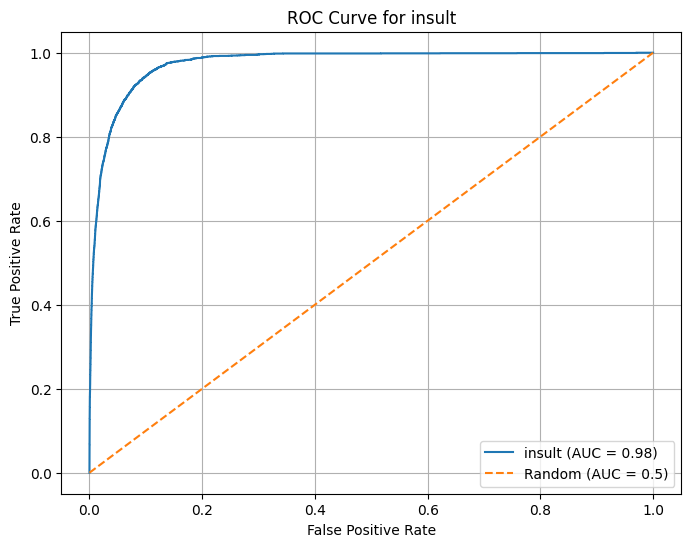

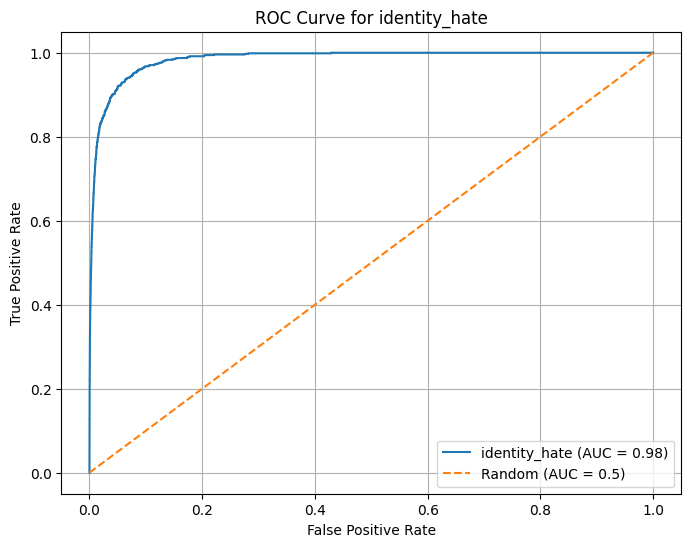

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
test_labels_binary = np.array(y_test_expanded)

for i, class_name in enumerate(class_names):
    y_true_class = (y_test[:, i] == 1).astype(int)  # Бінарні мітки для класу i
    fpr, tpr, thresholds = roc_curve(y_true_class, predictions_5[:, i])
    auc_score = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random (AUC = 0.5)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {class_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Висновок
ROC-AUC > 0.96 для всіх класів показує, що модель здатна ефективно розрізняти токсичність та нетоксичність, навіть для рідкісних класів, що є чудовим показником для мультікласової задачі класифікації.

## 4. Confusion Matrix

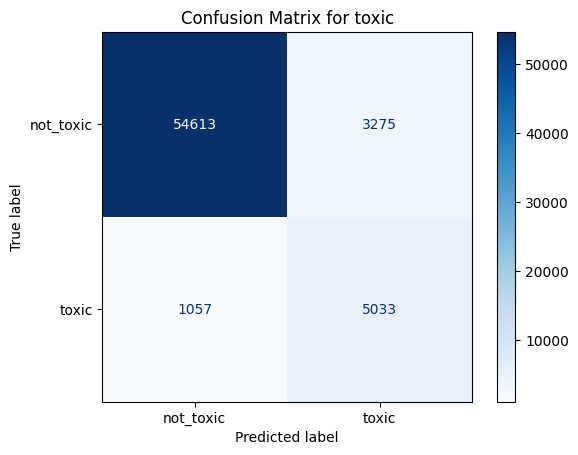

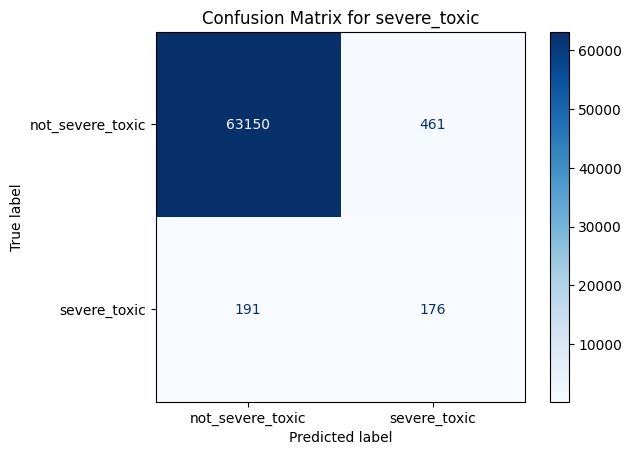

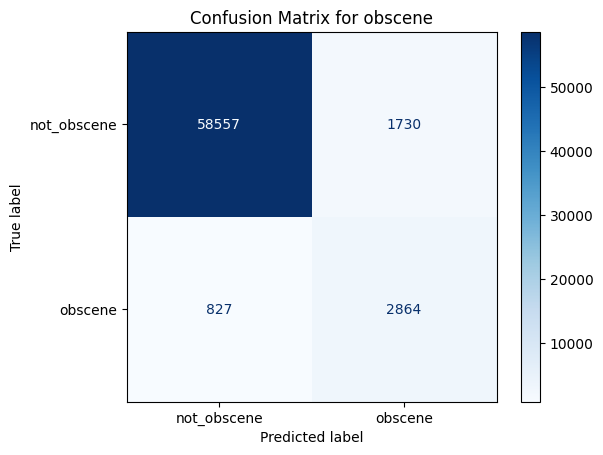

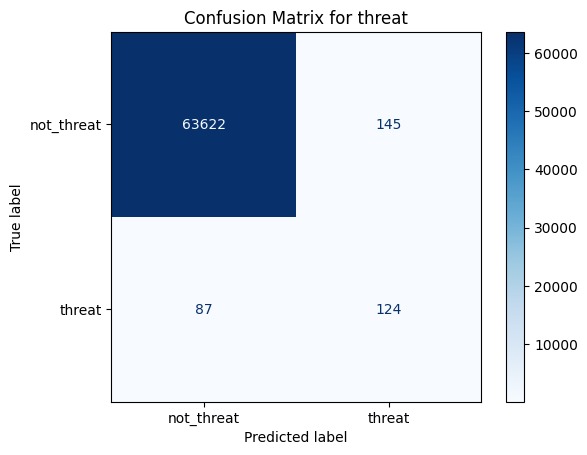

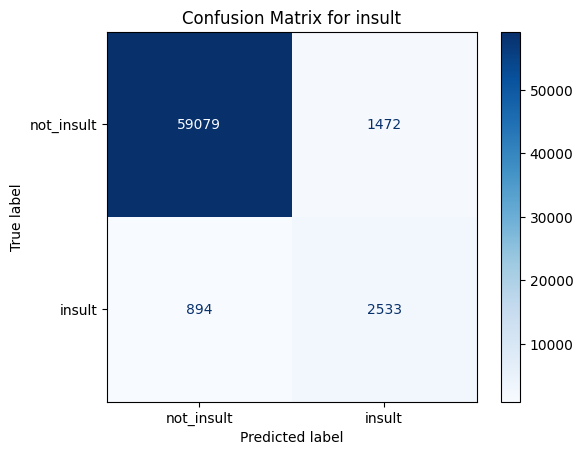

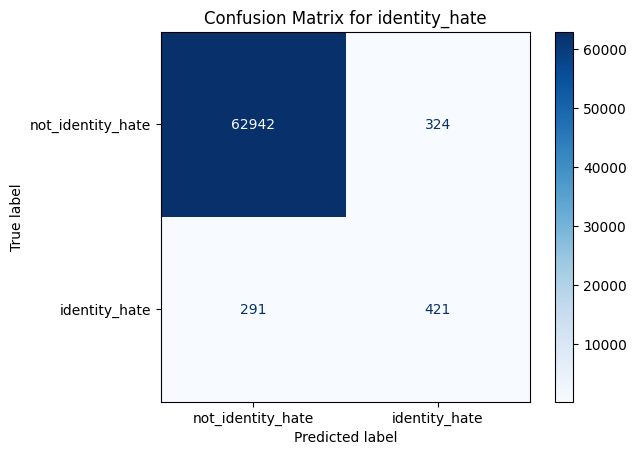

In [17]:
for i, class_name in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    cm = confusion_matrix(y_test[:, i], preds_binary_5[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"not_{class_name}", class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()

## 5. Історія навчання моделі

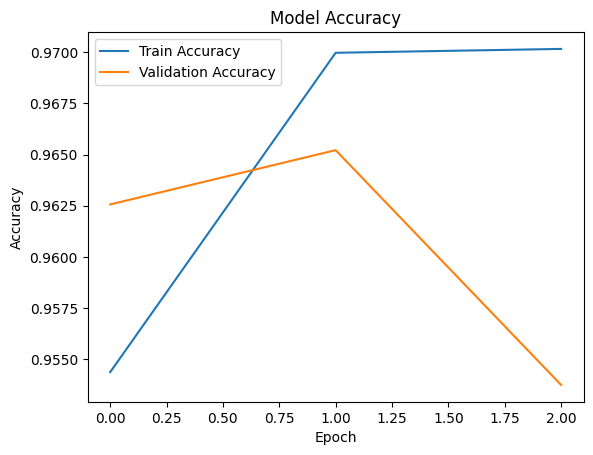

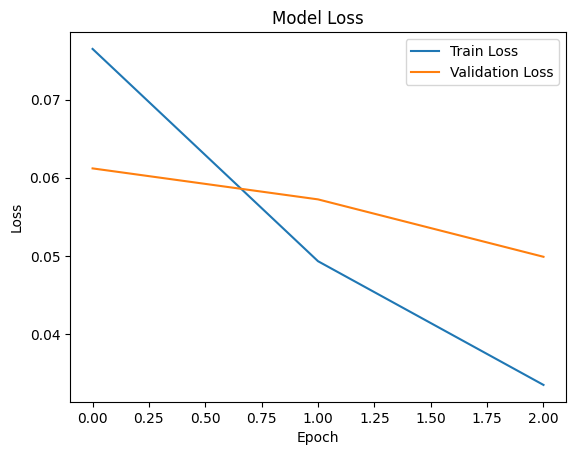

In [31]:
import json
with open('/kaggle/input/model-history-5/training_history_5.json', "r") as file:
    history = json.load(file)

if history:
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

### Висновок
Модель показує хороші результати на тренувальних даних (висока точність, низькі втрати), але при цьому погіршуються результати на валідаційних даних. Для покращення рекомендується зупинити навчання раніше, тобто після 2-ї епохи.

## 6. Оцінка прогнозів на конкретних прикладах

In [29]:
threshold_5 = 0.5
preds_binary_5 = (predictions_5 > threshold_5).astype(int)

# Виведення кількох прикладів коментарів із їхніми оцінками
for i in range(263, 267):  # Вивести 5 перших записів
    print(f"Comment {i + 1}: {test_data['cleaned_comment_text'].iloc[i]}")
    print(f"\nPredicted labels:\n-toxic={preds_binary_5[i, 0]}\n-severe_toxic={preds_binary_5[i, 1]}"
          f"\n-obscene={preds_binary_5[i, 2]}\n-threat={preds_binary_5[i, 3]}"
          f"\n-insult={preds_binary_5[i, 4]}\n-identity_hate={preds_binary_5[i, 5]}")
    print(f"\nTrue labels:\n-toxic={test_data['toxic'].iloc[i]}\n-severe_toxic={test_data['severe_toxic'].iloc[i]}, "
          f"\n-obscene={test_data['obscene'].iloc[i]}\n-threat={test_data['threat'].iloc[i]}, "
          f"\n-insult={test_data['insult'].iloc[i]}\n-identity_hate={test_data['identity_hate'].iloc[i]}")
    print("-" * 80)



Comment 264: casualt i fucked your mum and i liked it ies

Predicted labels:
-toxic=1
-severe_toxic=0
-obscene=1
-threat=0
-insult=1
-identity_hate=0

True labels:
-toxic=1
-severe_toxic=1, 
-obscene=1
-threat=0, 
-insult=1
-identity_hate=0
--------------------------------------------------------------------------------
Comment 265: Keep in find complete lies are still nonfiction if that is the format they present themselves in Hitlers propaganda was nonfiction in that it was not a work of imagination Instead it was untrue but still had a nonfiction format The reason it was untrue was not because it was imagined but instead it was because it was a product of misinformation ignorance and what is largely considered evil

Predicted labels:
-toxic=0
-severe_toxic=0
-obscene=0
-threat=0
-insult=0
-identity_hate=0

True labels:
-toxic=0
-severe_toxic=0, 
-obscene=0
-threat=0, 
-insult=0
-identity_hate=0
--------------------------------------------------------------------------------
Comment 